In [227]:
import math, time, sys, os
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

In [228]:
# All values in SI units
mass = 1
g = 9.81
k = 1000*100
y0 = 1
v0 = 0 # Upwards is positive
t0 = 0
t1 = 1
dt = 0.00001
t = np.linspace(t0, t1, round(1+(t1-t0)/dt))

y = np.zeros(len(t))
vy = np.zeros(len(t))
ay = np.zeros(len(t))
F_ground = np.zeros(len(t))
sumf = np.zeros(len(t)) # Sum of the forces
Ekin = np.zeros(len(t))
Epot = np.zeros(len(t))
Etot = np.zeros(len(t))
impulse = np.zeros(len(t))

#intitial conditions
y[0] = y0
vy[0] = v0

In [229]:
for i in range(len(t)-1):
    F_ground[i] = -k*y[i] if y[i] < 0 else 0
    Epot[i] = (1/2) * k * y[i]**2 + mass * g * y[i] if y[i] < 0 else mass*g*y[i]
    Ekin[i] = (1/2) * mass * vy[i]**2
    
    impulse[i+1] = impulse[i] + F_ground[i]*dt 
    
    sumf[i] = -mass*g + F_ground[i]
    ay[i] = sumf[i]/mass
    y[i+1] = y[i] + vy[i]*dt
    vy[i+1] = vy[i] + ay[i]*dt


    Etot[i] = Ekin[i] + Epot[i]

index = np.asarray(np.where(F_ground>0))[0]
n1 = index[0]
n2 = index[-1]

In [235]:
print(np.min(y))
print(np.max(F_ground))
print(Etot[-2] - Etot[0])

-0.014140730942826717
1414.0730942826717
0.09887221819181136


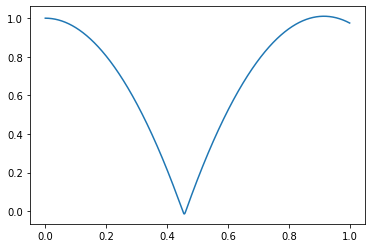

In [231]:
plt.plot(t, y)

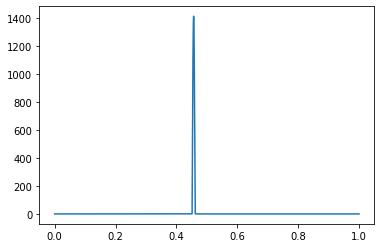

In [232]:
plt.plot(t, F_ground)

45153
46150
0.009969999999999979
8.881203519959293
-0.09780570000000033


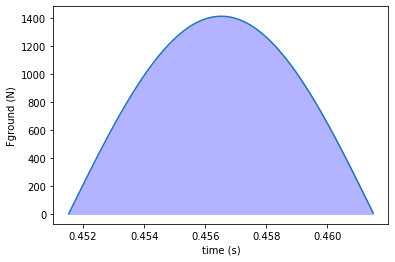

In [233]:
plt.plot(t[n1:n2],F_ground[n1:n2])
plt.fill_between(t[n1:n2],F_ground[n1:n2],color=[0.7,0.7,1] )
plt.xlabel('time (s)')
plt.ylabel('Fground (N)')
print(n1)
print(n2)
#Duration of impact
print(t[n2] - t[n1])

# Impulse difference point mass p = mv
p1 = mass * vy[n1]
p2 = mass * vy[n2]
print(p2 - p1)

# Impulse difference gravity \int_t1^t2 mgdt = mgt|_t1^t2
p3 = -mass * g * t[n2] - -mass * g * t[n1] 
print(p3)

In [234]:
print(impulse[-1])

8.979042365507173
